<a href="https://colab.research.google.com/github/2SEHI/K-Digital_Lecture/blob/main/0813_pyTorch(DL%2C%20CNN)/pyTorch(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network(CNN, 합성곱 신경망)

### 이미지 처리
피처가 서로 독립적(영향이 없어야)이어야 합니다.
상관계수가 높으면 독립적이지 않을 가능성이 높습니다.피처들끼리 선형 관계를 갖는 것을 다중 공선성이라고 하는데 좋은 모델을 가지지 못합니다.

- 일반적인 머신러닝에서는 Input변수가 서로 독립적이라는 가정하에서 수행되기 때문에 feature라는 말 대신에 independent variable이라고 부릅니다.

- 이미지 처리는 하나의 차원으로 표현되지 않습니다. 하나의 피처가 되는 것이 아니라 하나의 피처 주위에 있는 피처들이 결합이 되어야 하나의 그림이 나오게 됩니다. 그 점이 이미지 처리와 다른 머신러닝 처리와 다른점입니다.
- 이미지는 지역 정보(여러 개의 피처가 합쳐져서 표현)를 학습할 수 있는 신경망이 필요합니다. - CNN
- CNN은 하나의 피처를 독립적으로 보지 않고 주위 피처와 함께 학습시키는 신경망입니다. 이를 제안한 사람은 르쿤입니다.
- CNN의 일반적인 구조는 Region Feature를 만들어내는 Convolution Layer 그리고 Feature Dimention을 위한 Pooling Layer그리고 실제 출력을 만들어 낼 Fully Connected Layer 3부분으로 구성되는 경우가 일반적입니다.

### Convolution Layer
- Receptive Field 를 정의해서 입력층 이미지의 Feature를 추출하는 역할을 수행하는 Layer입니다.

### Receptive Field
- 이미지를 분할해서 하나의 값으로 만드는데 이 분할한 데이터의 크기를 Receptive Field라고 합니다

### stride 
- 이 크기가 이미지를 순회하면서 값을 하나씩 만들어갈텐데 이동하는 단위를 stride라고 합니다.

### padding
- 가장자리 부분은 중앙의 부분보다 연산에 적게 참여하게 됩니다. 따라서 가장 자리 부분이 중요할 때는 가장 자리 외곽에 0을 추가해서 다른 셀들과 연산의 개수를 맞춰줄 수 있는데 이 때 채워넣는 0을 padding이라고 합니다.

### weight sharing
- 각 Receptive Field별로 가중치를 소유하게 되면 학습해야 할 파라미터가 너무 많아지는데 가중치를 별도로 갖는게 아니라 공유하여 파라미터 수를 줄이는 것을 말합니다.

### Pooling Layer
- Feature의 사이즈를 줄이기 위해서 여러 개의 Feature의 값을 하나로 묶어주는 것으로 평균이나 최대값을 이용합니다.
- 일반적으로 Convolution과 Pooling을 번갈아가면서 설계합니다.

### Fully Connected Layer
- Pooling Layer에서 나온 Feaure를 Flatten시켜 MLP의 Input으로 놓고 학습을 진행합니다.

## 일반적인 DNN(MLP)와 CNN의 가장 큰 차이
- 이미지의 Feature를 어떻게 추출하느냐에 있습니다.
- MLP는 이미지의 픽셀 값을 Input으로 바로 사용하고 CNN은 Region Feature를 Convolution Layer와 Pooling Layer를 이용해서 추출하고 그 Feature를 MLP의 Input으로 해서 사용합니다.

- 딥러닝에서 입력이 중요하다

## 딥러닝 실험에 많이 사용되는 이미지 데이터 셋
- MNIST, Fashion MNIST

## CNN에서 많이 사용되는 이미지 데이터 셋
- CIFAR-10 Dataset :토론토 대학교에서 제공하는 10가지 클래스(비행기, 자동차, 새, 고양이, 사슴, 개, 개구리,말, 배, 트럭)로 구성된 60,000장의 이미지 입니다. 공부할 때 많이 이용합니다.

- ImageNet : 1000가지의 이미지를 가진 데이터 셋
- 구글의 데이터 셋, 말뭉치 데이터셋만 745기가


## CIFAR-10 Dataset분류를 위한 MLP설계

### 과정 
1. 모듈 임포트
2. 장비 확인
3. 데이터 다운로드
4. 데이터확인
5. MLP모델 설계
6. Optimizer, Objective Function설계
7. 성능 확인 하는 함수 설계
8. 검증하는 함수
9. 학습 수행

## CIFAR-10 데이터 분류를 위한 MLP
- 모듈 import


In [ ]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from torchvision import transforms, datasets

# GPU사용 가능한지 확인
import torch
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print('torch version : ', torch.__version__)
print('DEVICE : ', DEVICE)

torch version :  1.9.0+cu102
DEVICE :  cuda


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/data/CIFAR_10',
                                 train=True,
                                 download=True,
                                 transform=transforms.ToTensor()) # 변환

test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/data/CIFAR_10',
                                 train=False,
                                 download=True,
                                 transform=transforms.ToTensor()) # 변환

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/CIFAR_10/cifar-10-python.tar.gz to /content/drive/MyDrive/Colab Notebooks/data/CIFAR_10
Files already downloaded and verified


## 데이터 확인

In [ ]:
for (X_train, y_train) in train_loader:
    print(X_train.size())
    print(y_train.size())
    break
# 32(배치 사이즈), 3(채널의 수), 32(width), 32(height)

torch.Size([32, 3, 32, 32])
torch.Size([32])


## 위치 변환
- transpose를 이용하여 2차원배열로 변환
- 32(배치 사이즈), 3(채널의 수), 32(width), 32(height)

torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


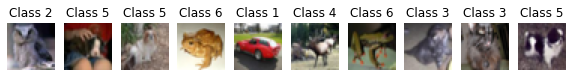

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    print(X_train[i].shape)
    print(np.transpose(X_train[i], (1, 2, 0)).shape)
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))

    plt.title('Class ' + str(y_train[i].item()))

## 모델 설계

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 *3, 512) # 이미지 픽셀, 뉴런
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10) # 클래스가 10개

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # keras의 Flatten과 동일
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

## 모델의 성능을 확인하는 함수

In [ ]:
# 훈련과정에서 호출될 함수
def train(model, train_loader, optimizer, log_interval):
    # 모델 훈련 시작
    model.train() 
    # train_loader 에는 학습에 이용되는 이미지 데이터와 레이블 데이터가 Mini Batch 단위로 묶여 저장되어 있음
    # 훈련 데이터의 배치 번호와 이미지 및 레이블을 순회
    for batch_idx, (image, label) in enumerate(train_loader):
        # image와 label을 DEVICE에 할당
        image = image.to(DEVICE)
        label = label.to(DEVICE)

        # 기존에 정의한 장비에 이미지 데이터와 레이블 데이터를 할당할 경우
        # 과거에 이용한 Mini- Batch 내에 있는 이미지 데이터와 레이블 데이터를 
        # 바탕으로 계산된 Loss의 Gradient 값이 optimizer에 할당돼 있으므로 
        # optimizer의 Gradient를 초기화
        optimizer.zero_grad()
        # image를 가지고 예측
        output = model(image)
        # 손실 계산
        loss = criterion(output, label)
        # 손실 역전파
        loss.backward()
        # 파라미터 값(weight)을 업데이트
        ## weight를 업데이트 하고 사용한 optimizer는 None으로 초기화 하는 것!
        ## loss가 적을 때의 weight만 업데이트하고 
        optimizer.step()
#         print(optimizer)
        
        # 출력
        if batch_idx % log_interval == 0:
            print('Train Epoch:{}[{}/{} {:.0f}%]\tTrain Loss:{:.6f}'.
                  format(epoch, batch_idx*len(image), len(train_loader.dataset), 100*batch_idx/len(train_loader), loss.item()))
            
def evaluate(model, test_loader):
    # 모델 훈련 시작
    model.eval()
    
    # loss를 누적할 변수
    total_loss = 0
    # 정확한 데이터의 개수를 세기 위한 변수
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            # image와 label을 DEVICE에 할당
            image = image.to(DEVICE)
            label = label.to(DEVICE)

            # image를 가지고 예측
            output = model(image)
            
            #  손실을 계산
            total_loss += criterion(output, label).item()
           
            # 정답의 개수를 계산
            # 확률이 제일 큰것
            prediction = output.max(1, keepdim = True)[1]
            # 예측과 정답의 개수가 같을 때만 correct 1 증가
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    # 손실의 평균 구하기
    total_loss /= len(test_loader.dataset)
    # 정확도
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # 평균 손실과 정확도 반환
    return total_loss, test_accuracy

## 모델을 생성하고 Optimizer와 Object Function설정

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))


Train Epoch:1[0/50000 0%]	Train Loss:2.309738
Train Epoch:1[6400/50000 13%]	Train Loss:1.867645
Train Epoch:1[12800/50000 26%]	Train Loss:1.833509
Train Epoch:1[19200/50000 38%]	Train Loss:1.856141
Train Epoch:1[25600/50000 51%]	Train Loss:1.871243
Train Epoch:1[32000/50000 64%]	Train Loss:1.749689
Train Epoch:1[38400/50000 77%]	Train Loss:1.861380
Train Epoch:1[44800/50000 90%]	Train Loss:1.899096

[EPOCH: 1], 	Test Loss: 0.0562, 	Test Accuracy: 34.53 % 

Train Epoch:2[0/50000 0%]	Train Loss:1.694686
Train Epoch:2[6400/50000 13%]	Train Loss:1.671365
Train Epoch:2[12800/50000 26%]	Train Loss:1.857693
Train Epoch:2[19200/50000 38%]	Train Loss:1.957044
Train Epoch:2[25600/50000 51%]	Train Loss:1.358086
Train Epoch:2[32000/50000 64%]	Train Loss:1.490874
Train Epoch:2[38400/50000 77%]	Train Loss:1.716103
Train Epoch:2[44800/50000 90%]	Train Loss:1.612501

[EPOCH: 2], 	Test Loss: 0.0499, 	Test Accuracy: 43.28 % 

Train Epoch:3[0/50000 0%]	Train Loss:1.549650
Train Epoch:3[6400/50000 13%]	Tr

## CNN 적용

### 모델 설계


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # in_channels : 채널의 수
        # out_channels : Convolution 연산 결과로 만들어지는 Feature Map의 깊이
        # kernel_size : Filter의 크기, padding은 추가해 줄 0의 개수
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels=8,
                               kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels=16,
                               kernel_size=3, padding=1)
        
        # 묶어서 대표값으로 설정
        # 2 * 2단위로 묶을 것이고 간격은 2
        # 최대값으로 표현
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 16, 64) # Conv2d(in_channels = 8, out_channels=16 와 연결되는 부분
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 8 * 8 * 16)  # keras의 Flatten과 동일
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

## 모델 훈련
CNN을 써서 분류 성능이 더 좋아졌습니다.

In [ ]:
# 모델 객체 생성
# DEVICE 장비를 이용해 MLP 모델을 완성하기 위해서
model = CNN().to(DEVICE)

# 파라미터를 업데이트할 때 반영될 Learning Rate를 0.01, Optimizer의 관성을 나타내는 momentum을 0.5로 설정 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
# Optimizer
criterion = nn.CrossEntropyLoss() # 손실 함수

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))


Train Epoch:1[0/50000 0%]	Train Loss:2.296775


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch:1[6400/50000 13%]	Train Loss:2.024764
Train Epoch:1[12800/50000 26%]	Train Loss:1.769079
Train Epoch:1[19200/50000 38%]	Train Loss:1.499680
Train Epoch:1[25600/50000 51%]	Train Loss:1.517291
Train Epoch:1[32000/50000 64%]	Train Loss:1.488950
Train Epoch:1[38400/50000 77%]	Train Loss:1.704513
Train Epoch:1[44800/50000 90%]	Train Loss:1.531896

[EPOCH: 1], 	Test Loss: 0.0445, 	Test Accuracy: 48.97 % 

Train Epoch:2[0/50000 0%]	Train Loss:1.572669
Train Epoch:2[6400/50000 13%]	Train Loss:1.123534
Train Epoch:2[12800/50000 26%]	Train Loss:1.187911
Train Epoch:2[19200/50000 38%]	Train Loss:1.271878
Train Epoch:2[25600/50000 51%]	Train Loss:1.331574
Train Epoch:2[32000/50000 64%]	Train Loss:1.638503
Train Epoch:2[38400/50000 77%]	Train Loss:0.938312
Train Epoch:2[44800/50000 90%]	Train Loss:1.572709

[EPOCH: 2], 	Test Loss: 0.0414, 	Test Accuracy: 52.24 % 

Train Epoch:3[0/50000 0%]	Train Loss:1.438064
Train Epoch:3[6400/50000 13%]	Train Loss:1.296253
Train Epoch:3[12800/50000 26

## Data Augmentation
데이터 개수가 너무 적을때 늘려줄 목적으로 사용하는데 이 방법을 사용하면 성능이 소폭 상승한다고 알려져 있습니다.
- 이미지 데이터를 Flip, Rotation, Crop, Scaling 하는 것도 가능합니다
- Cutout : 일정 부분을 까맣게 칠해버리는 것으로 일종의 Dropout이라고 볼 수 있습니다.
-  CutMix : 두개의 이미지를 합쳐 놓고 Label을 학습시킬 때 각각의 이미지가 차지하는 비율을 조절해서 학습시키는 방법입니다.

- 이미지 편집함수 [documentation](https://pytorch.org/vision/stable/transforms.html)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/data/CIFAR_10',
                                 train=True,
                                 download=True,
                                 transform=transforms.Compose([
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     # RGB이기 때문에 앞에는 표준, 뒤에는 표준편차를 설정해줍니다
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
                                 ])) # 변환

test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/Colab Notebooks/data/CIFAR_10',
                                 train=False,
                                #  download=True,
                                 transform=transforms.Compose([
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     # RGB이기 때문에 앞에는 표준, 뒤에는 표준편차를 설정해줍니다
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
                                 ])) # 변환

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

Files already downloaded and verified


In [ ]:
# 모델 객체 생성
# DEVICE 장비를 이용해 MLP 모델을 완성하기 위해서
model = CNN().to(DEVICE)

# 파라미터를 업데이트할 때 반영될 Learning Rate를 0.01, Optimizer의 관성을 나타내는 momentum을 0.5로 설정 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
# Optimizer
criterion = nn.CrossEntropyLoss() # 손실 함수

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))


Train Epoch:1[0/50000 0%]	Train Loss:2.313029
Train Epoch:1[6400/50000 13%]	Train Loss:1.815491
Train Epoch:1[12800/50000 26%]	Train Loss:1.616790
Train Epoch:1[19200/50000 38%]	Train Loss:1.632145
Train Epoch:1[25600/50000 51%]	Train Loss:1.828234
Train Epoch:1[32000/50000 64%]	Train Loss:1.503803
Train Epoch:1[38400/50000 77%]	Train Loss:1.481256
Train Epoch:1[44800/50000 90%]	Train Loss:1.483725

[EPOCH: 1], 	Test Loss: 0.0418, 	Test Accuracy: 51.02 % 

Train Epoch:2[0/50000 0%]	Train Loss:1.253558
Train Epoch:2[6400/50000 13%]	Train Loss:1.469885
Train Epoch:2[12800/50000 26%]	Train Loss:1.307070
Train Epoch:2[19200/50000 38%]	Train Loss:1.218100
Train Epoch:2[25600/50000 51%]	Train Loss:1.089335
Train Epoch:2[32000/50000 64%]	Train Loss:1.431363
Train Epoch:2[38400/50000 77%]	Train Loss:1.343669
Train Epoch:2[44800/50000 90%]	Train Loss:1.541214

[EPOCH: 2], 	Test Loss: 0.0373, 	Test Accuracy: 58.02 % 

Train Epoch:3[0/50000 0%]	Train Loss:1.197668
Train Epoch:3[6400/50000 13%]	Tr

## Data Augmentation(DataSet 합치기)
- Dataset의 data를 호출하면 numpy배열로 데이털를 리턴하고 targets 가 레이블을 

In [ ]:
print(type(train_dataset))
print(type(train_dataset.data)) # feature 데이터를 numpy배열로 리턴한 것입니다.
print(train_dataset.data.shape)

print(type(train_dataset.targets)) # label 데이터를 가져오기
print(len(train_dataset.targets))

<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'numpy.ndarray'>
(50000, 32, 32, 3)
<class 'list'>
50000


### numpy합치는 방법 2가지
- 이때 주의할 점은 feature의 데이터개수를 늘리고 레이블도 늘려줘야 합니다.
1. r_ 또는 c_사용
- np.r_[ndarray, ndarray] : 세로로 합치기
- np.c_[ndarray, ndarray] : 가로로 합치기

3. \+ 연산자로 연결

In [ ]:
# numpy 배열을 세로로 합치기
train_dataset.data = np.r_[train_dataset.data, train_dataset.data]
print(train_dataset.data.shape)
# numpy 배열을 가로로 합치기
# train_dataset.data = np.c_[train_dataset.data, train_dataset.data]

# 레이블 세로로 합치기
train_dataset.targets = np.r_[train_dataset.targets, train_dataset.targets]
# train_dataset.targets = train_dataset.targets, train_dataset.targets
print(len(train_dataset.targets))

(100000, 32, 32, 3)
100000


## 전이 학습
### ImageNet
- 학습 데이터가 138GB정도 되는 1400만 장의 이미지로 구성된 데이터 셋
- 이미지를 분류하는 모델 대회를 ImageNet Large Scal Visual Recognition Challenge(ILVRC)라고 합니다.
- 2015년부터 등장한 모델들은 인간의 성능을 뛰어 넘었고 깊이는 152층을 넘어섰습니다.

### 많이 알려지고 언급되는 모델
- LeNet :실제로 많이 사용되진 않습니다. Yann LeCun 교수가 제안한 모델로 Convolution Layer 2개, Pooling Layer 2개, Fully Connected Layer 3개를 갖는 구조
- AlexNet : 2014년 대회의 우승 모델로 Activation함수로 ReLU를 사용했고 Dropout과 Data Augmetation을 적용
- VGG : 2014년 대회의 2등 모델로 3X3 Convolution Layer를 중첩의 깊이에 따라 분류를 하는데 VFF16이면 16개 Layer가 있다는 뜻입니다. 
- GoogLeNet : inception을 도입. 기초적인 인셉션은 한번에 conv2D가 3개와 Maxpooling이 들어갑니다. 차원감소를 더한 인셉션 모듈도 있습니다.
- ResNet : Residual Network의 약자로 MS에서 제안한 모델입니다. 이전 까지의 모델들은 깊이가 깊어지면 이전의 Layer의 특성을 제대로 반영하기가 어려웠습니다. 점점 줄여나가는 방식이기 때문에.
residual Block의 개념을 도입해서 이전 Layer의 Feature Map을 다음 Layer의 Feature Map에 더해주는 개념으로 이를 Skip Connection 이라고도 합니다. 현재 가장 많이 언급된 모델중에 하나입니다.
- DenseNet : ResNet의 확장버전입니다. ResNet은 이전 Layer와 현재 Layer의 Feature Map을 더하는 개념인데 (Dense는 밀집의 개념임) 이전 모든 Layer의 Feature Map 을 같이 학습시키는 모델입니다.

### Pytorch에서 제공하는 모델
- https://pytorch.org/vision/stable/models.html
- pretrained:True  사전에 훈련된 모델을 사용할 것인지를 설정
- 

#### ResNet34  모델을 불러와서 CIFAR10

In [ ]:
import torchvision.models as models

# 사전 훈련된 파라미터를 수정하지 않고 ResNet34모델을 사용
model = models.resnet34(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10) # 분류 개수를 써줘야 합니다.

model = model.to(DEVICE)

### 모델 훈련

In [ ]:
# 파라미터를 업데이트할 때 반영될 Learning Rate를 0.01, Optimizer의 관성을 나타내는 momentum을 0.5로 설정 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
# Optimizer
criterion = nn.CrossEntropyLoss() # 손실 함수

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch:1[0/100000 0%]	Train Loss:2.674471
Train Epoch:1[6400/100000 6%]	Train Loss:1.447329
Train Epoch:1[12800/100000 13%]	Train Loss:1.520754
Train Epoch:1[19200/100000 19%]	Train Loss:1.468983
Train Epoch:1[25600/100000 26%]	Train Loss:1.617825
Train Epoch:1[32000/100000 32%]	Train Loss:1.679589
Train Epoch:1[38400/100000 38%]	Train Loss:1.495975
Train Epoch:1[44800/100000 45%]	Train Loss:1.553312
Train Epoch:1[51200/100000 51%]	Train Loss:1.247786
Train Epoch:1[57600/100000 58%]	Train Loss:1.246816
Train Epoch:1[64000/100000 64%]	Train Loss:1.128216
Train Epoch:1[70400/100000 70%]	Train Loss:1.157373
Train Epoch:1[76800/100000 77%]	Train Loss:1.269215
Train Epoch:1[83200/100000 83%]	Train Loss:1.361128
Train Epoch:1[89600/100000 90%]	Train Loss:1.258817
Train Epoch:1[96000/100000 96%]	Train Loss:1.188125

[EPOCH: 1], 	Test Loss: 0.0301, 	Test Accuracy: 66.54 % 

Train Epoch:2[0/100000 0%]	Train Loss:0.701594
Train Epoch:2[6400/100000 6%]	Train Loss:1.116658
Train Epoch:2[12800

## 모델을 변경하고 훈련
- 사전 훈련된 파라미터를 변경하도록 설정하는 것을 Fine Tuning이라고 합니다.

In [ ]:
import torchvision.models as models

# 사전 훈련된 파라미터를 수정하지 않고 ResNet34모델을 사용
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10) # 분류 개수를 써줘야 합니다.

model = model.to(DEVICE)

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Train Epoch:1[0/100000 0%]	Train Loss:2.536115
Train Epoch:1[6400/100000 6%]	Train Loss:2.499615
Train Epoch:1[12800/100000 13%]	Train Loss:2.578057
Train Epoch:1[19200/100000 19%]	Train Loss:2.480688
Train Epoch:1[25600/100000 26%]	Train Loss:2.664305
Train Epoch:1[32000/100000 32%]	Train Loss:2.683694
Train Epoch:1[38400/100000 38%]	Train Loss:2.488417
Train Epoch:1[44800/100000 45%]	Train Loss:2.816444
Train Epoch:1[51200/100000 51%]	Train Loss:2.621093
Train Epoch:1[57600/100000 58%]	Train Loss:2.442512
Train Epoch:1[64000/100000 64%]	Train Loss:2.427977
Train Epoch:1[70400/100000 70%]	Train Loss:2.426350
Train Epoch:1[76800/100000 77%]	Train Loss:2.552855
Train Epoch:1[83200/100000 83%]	Train Loss:2.459888
Train Epoch:1[89600/100000 90%]	Train Loss:2.378116
Train Epoch:1[96000/100000 96%]	Train Loss:2.564562

[EPOCH: 1], 	Test Loss: 0.0827, 	Test Accuracy: 8.24 % 

Train Epoch:2[0/100000 0%]	Train Loss:2.565287
Train Epoch:2[6400/100000 6%]	Train Loss:2.697959
Train Epoch:2[12800/

## Transfer Learning(전이 학습)
- 미리 학습해 놓은 딥 러닝 모델을 가져와 재학습하는 방법
- Pre-Trained Model을 로드한 후 Fully Connected Layer 앞 단 네트워크의 Weight를 가져오고 Fully Connected Layer를 디자인해서 사용합니다.
- 주의 할 점은 전이 학습을 할 떄 Fully Connected Layer부분의 Weight만 학습을 진행합니다
- 일반적으로 소량의 보다 가 성능이 높을 가능성이 있습니다.
- 파라미터가 워낙 많기 때문에 웬만하면 GPU환경에서 하는것이 좋습니다.